# Table of Contents

### 1. Data Exploration & Pre-Processing
### 2. Implementation of Machine Learning Algorithms
> 2.1 Supervised learning - Random Forest   
>> 2.1.1 Data Preparation   
>> 2.1.2 Learning    
>> 2.1.3 Evaluation   
>> 2.1.4 Optimisation of Algorithms

> 2.2 Unsupervised learning - K-means Clustering
>> 2.2.1 Data Preparation   
>> 2.2.2 Learning   
>> 2.2.3 Evaluation   
>> 2.2.4 Optimisation of Algorithms

> 2.3 Semi-supervised learning - Label Propagation
>> 2.3.1 Data Preparation   
>> 2.3.2 Learning   
>> 2.3.3 Evaluation   
>> 2.3.4 Optimisation of Algorithms

### 3. Final Evaluation
<hr>
<hr>

# 1. Data Exploration & Pre-Processing

In [1]:
#Importing all Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, minmax_scale, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation

In [2]:
# Load dataset
db = pd.read_csv('dataset.csv')
db.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Buy
0,1,Male,19,15,39,0
1,2,Male,,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Male,31,17,40,1


In [3]:
# Replace several column labels for better convenience
db.rename(columns={'Annual Income (k$)':'AnnualIncome', 'Spending Score (1-100)':'SpendingScore'}, inplace=True)
db

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Buy
0,1,Male,19,15,39,0
1,2,Male,,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Male,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,,126,74,1
198,199,Female,32,137,18,0


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    object
 3   AnnualIncome   200 non-null    object
 4   SpendingScore  200 non-null    int64 
 5   Buy            200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [5]:
# Drop CustomerID which is not obviously a contributing feature
db.drop(['CustomerID'], axis=1, inplace=True)

In [6]:
# Repalce Male to 1 and Female to 0
le = LabelEncoder()
le.fit(['Female', 'Male', "Female"])
db['Gender'] = le.transform(db['Gender'])

In [7]:
db['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
195    0
196    0
197    1
198    0
199    1
Name: Gender, Length: 200, dtype: int64

In [8]:
len(db.index)

200

In [9]:
# Check null
print((db.isnull()).sum())

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
Buy              0
dtype: int64


In [10]:
# Convert ' ' to NaN
db['Age'].replace(' ', -999, inplace=True)
db['AnnualIncome'].replace(' ', -999, inplace=True)
db['Age'] = db['Age'].astype('int64')
db['AnnualIncome'] = db['AnnualIncome'].astype('int64')
db['Age'].replace( -999, np.NaN, inplace=True)
db['AnnualIncome'].replace(-999, np.NaN,inplace=True)

In [11]:
db['Age']

0      19.0
1       NaN
2      20.0
3      23.0
4      31.0
       ... 
195    35.0
196    45.0
197     NaN
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64

In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         200 non-null    int64  
 1   Age            186 non-null    float64
 2   AnnualIncome   180 non-null    float64
 3   SpendingScore  200 non-null    int64  
 4   Buy            200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [13]:
db.describe()

,Gender,Age,AnnualIncome,SpendingScore,Buy
count,200.000000,186.000000,180.000000,200.000000,200.000000
mean,0.465000,39.086022,59.694444,50.200000,0.390000
std,0.500025,13.956036,25.786423,25.823522,0.488974
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,29.000000,40.000000,34.750000,0.000000
50%,0.000000,36.000000,61.000000,50.000000,0.000000
75%,1.000000,49.000000,78.000000,73.000000,1.000000
max,1.000000,70.000000,137.000000,99.000000,1.000000


In [14]:
# Check number of NaN
print((db.isnull()).sum())

Gender            0
Age              14
AnnualIncome     20
SpendingScore     0
Buy               0
dtype: int64


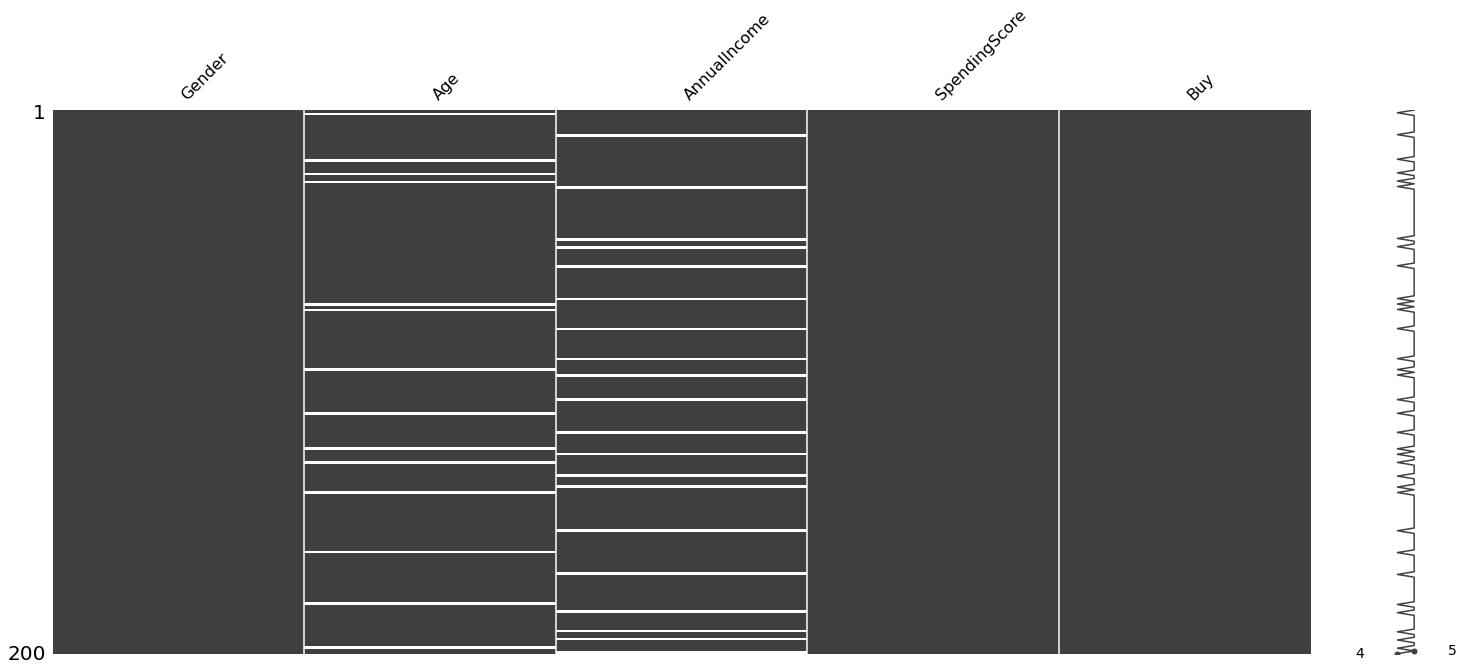

In [15]:
# Missing data
msno.matrix(db)
plt.show()

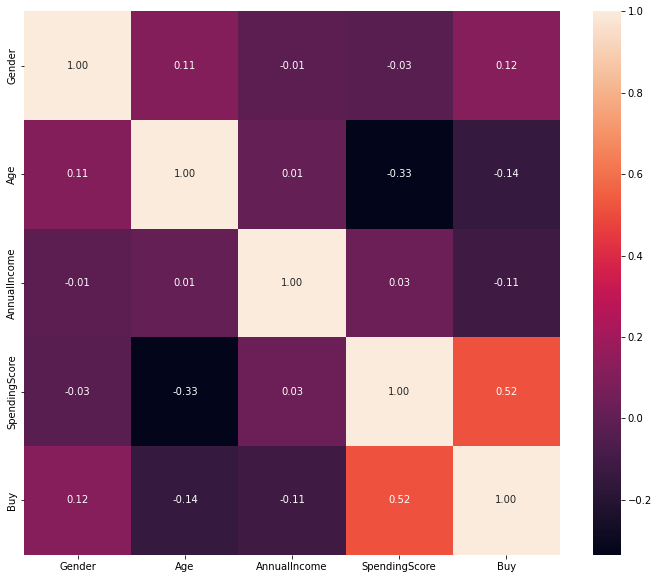

In [16]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(), annot=True, fmt=".2f")
plt.show()

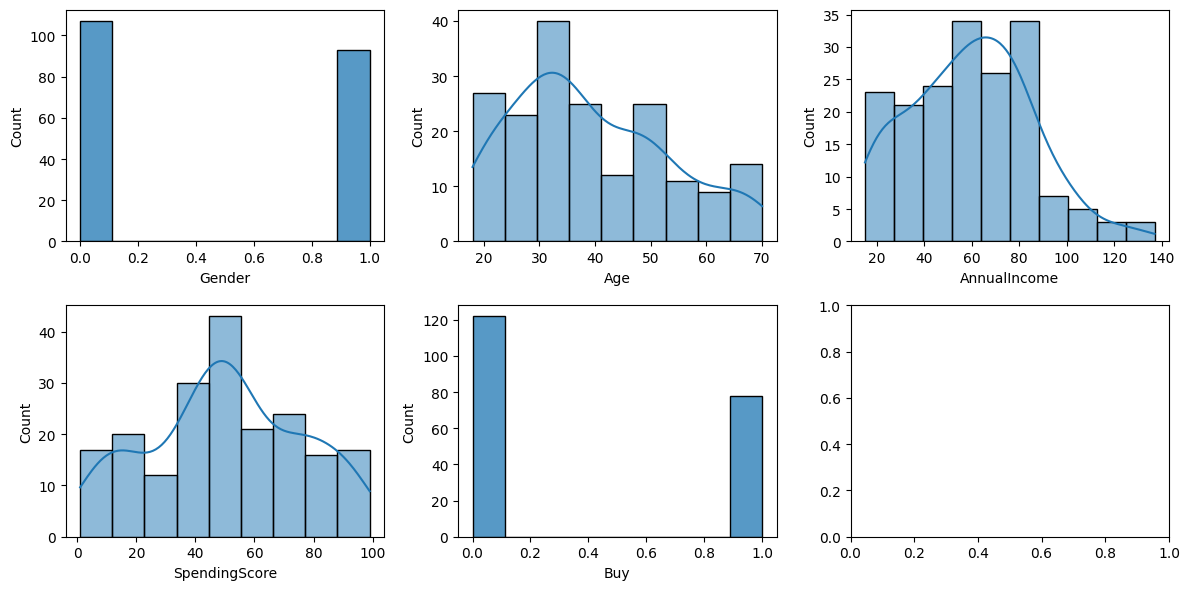

In [17]:
# Variable histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), dpi=100)
sns.histplot(db['Gender'], ax=axes[0][0])
sns.histplot(db['Age'], ax=axes[0][1], kde=True)
sns.histplot(db['AnnualIncome'], ax=axes[0][2], kde=True)
sns.histplot(db['SpendingScore'], ax=axes[1][0], kde=True)
sns.histplot(db['Buy'], ax=axes[1][1])
plt.tight_layout()
plt.show()

<AxesSubplot: >

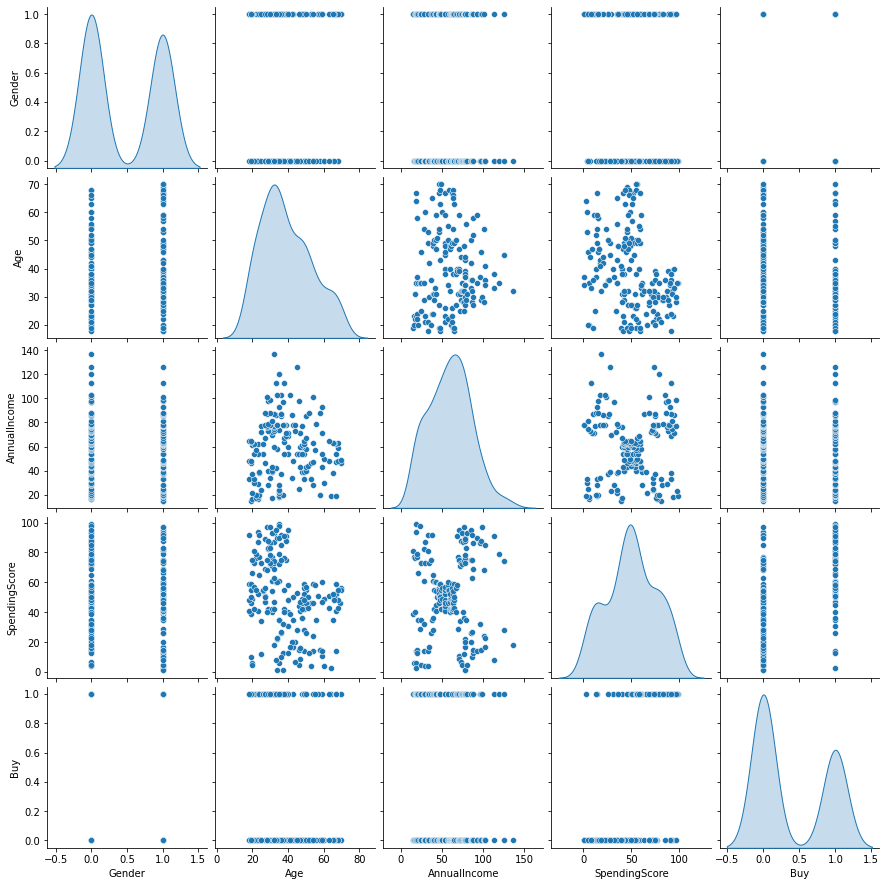

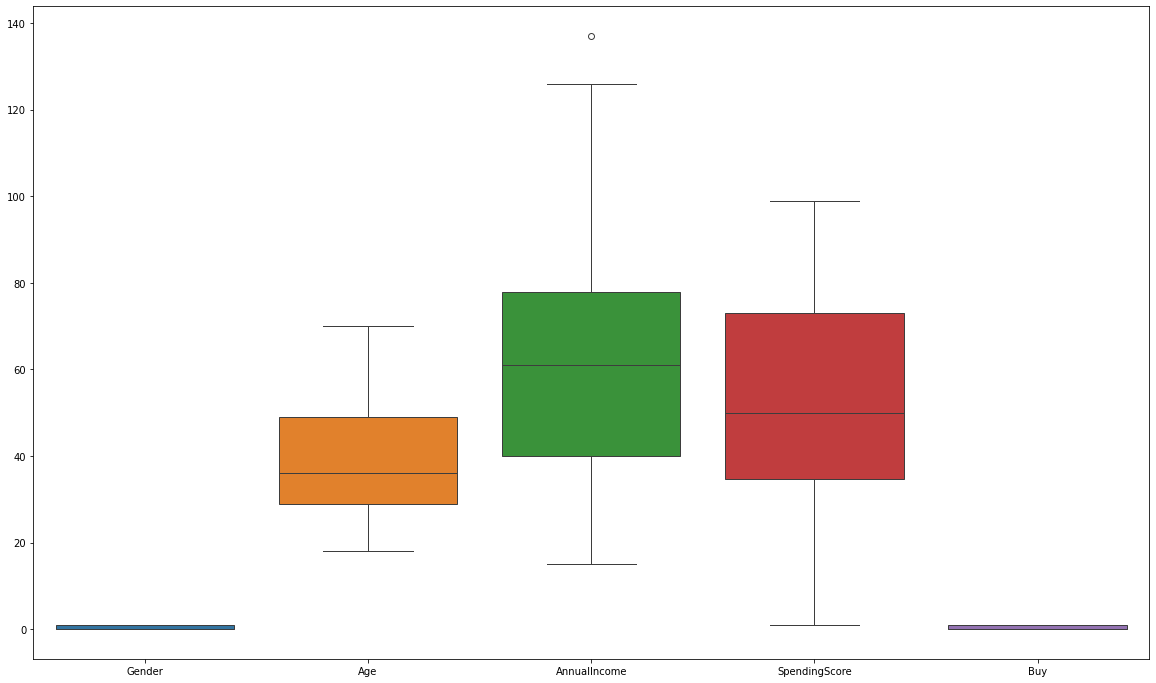

In [18]:
# Variable pariplot & boxplot
sns.pairplot(data=db, diag_kind='kde')
plt.figure(figsize=(20,12))
sns.boxplot(data=db)

In [19]:
# Imputation
db['Age'].fillna(db['Age'].mean(), inplace=True)
db['AnnualIncome'].fillna(db['AnnualIncome'].mean(), inplace=True)

print((db.isnull()).sum())

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
Buy              0
dtype: int64


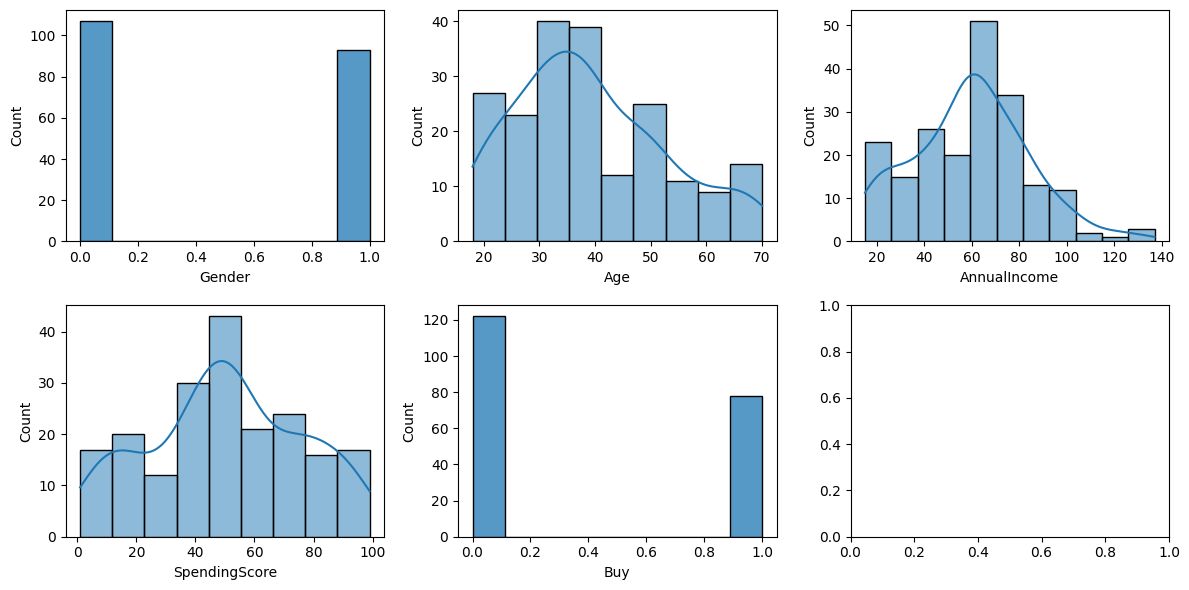

In [20]:
# Variable histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), dpi=100)
sns.histplot(db['Gender'], ax=axes[0][0])
sns.histplot(db['Age'], ax=axes[0][1], kde=True)
sns.histplot(db['AnnualIncome'], ax=axes[0][2], kde=True)
sns.histplot(db['SpendingScore'], ax=axes[1][0], kde=True)
sns.histplot(db['Buy'], ax=axes[1][1])
plt.tight_layout()
plt.show()

In [21]:
db.describe()

,Gender,Age,AnnualIncome,SpendingScore,Buy
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.465000,39.086022,59.694444,50.200000,0.390000
std,0.500025,13.456168,24.456319,25.823522,0.488974
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,29.750000,43.000000,34.750000,0.000000
50%,0.000000,38.000000,59.694444,50.000000,0.000000
75%,1.000000,48.000000,76.250000,73.000000,1.000000
max,1.000000,70.000000,137.000000,99.000000,1.000000


# 2. Implementation of Machine Learning Algorithms

## 2.1 Supervised learning - Random Forest

### 2.1.1 Data Preparation

In [22]:
X = db.drop(['Buy'], axis = 1)
y = db['Buy']

### 2.1.2 Learning

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21, stratify=y)

In [24]:
# Apply normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.1.3 Evaluation

In [25]:
# create a random forest classifier
rf = RandomForestClassifier()

# fit the random forest on the training dataset
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.82


In [26]:
# Noticeable that the model is overfitting

In [27]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.82
Precision: 0.76
Recall: 0.81
F1: 0.79


Text(0.5, 1.0, 'Confusion Matrix')

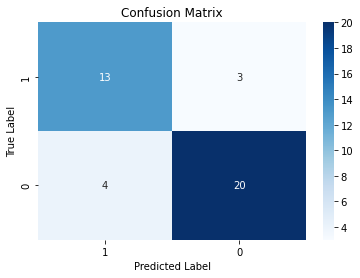

In [28]:
# plot confusion matrix
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC Score: 0.90


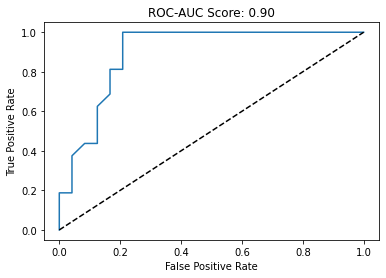

In [29]:
# ROC-AUC Score
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc:.2f}')
plt.show()

### 2.1.4 Optimisation of Algorithms

#### 2.1.4.1 Tuning hyperparameters using GridSearchCV

In [30]:
# Spliting data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21, shuffle=True, stratify=y)

In [31]:
# Apply normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Set parameter grid
params = {'bootstrap': [True],
        'max_depth': [4, 6, 8],
        'max_features': [2, 4, 6],
        'min_samples_leaf': [2, 4, 6],
        'n_estimators': [10, 100, 1000]}

# Apply GridSearchCV
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rfc, param_grid = params, n_jobs = -1, cv=StratifiedKFold(), scoring='recall')
grid_cv.fit(X_train, y_train)

print('Optimised hyper params: ', grid_cv.best_params_)
print(f'Best accuracy: {grid_cv.best_score_:.2f}')

Optimised hyper params:  {'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 6, 'n_estimators': 1000}
Best accuracy: 0.78


In [33]:
# Build a new model with optimised hyper parameters retrieved above
rf_optimised = RandomForestClassifier(n_estimators = 1000, 
                                max_depth = 4,
                                max_features = 2,
                                min_samples_leaf = 6,
                                random_state = 0,
                                bootstrap=True,
                                n_jobs = -1)
rf_optimised.fit(X_train, y_train)
y_pred_train = rf_optimised.predict(X_train)
print(f'Train accuracy: {accuracy_score(y_train,y_pred_train):.2f}')
y_pred = rf_optimised.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test,y_pred):.2f}')

Train accuracy: 0.81
Test accuracy: 0.82


In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.82
Precision: 0.76
Recall: 0.81
F1: 0.79


Text(0.5, 1.0, 'Confusion Matrix')

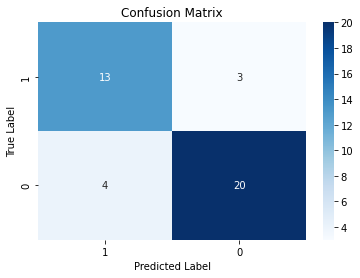

In [35]:
# plot confusion matrix
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC Score: 0.87


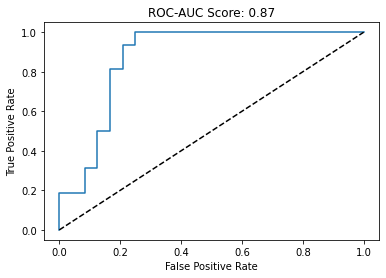

In [36]:
#ROC-AUC Score
y_pred_prob = rf_optimised.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc:.2f}')
plt.show()

#### 2.1.4.2 Tuning hyperparameters manually

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21, stratify=y)

# Apply normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=5,
                            min_samples_leaf=5,min_samples_split=5,random_state=21)

# fit the random forest on the training dataset
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Train Accuracy: 0.86
Test Accuracy: 0.88


In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.88
Precision: 0.79
Recall: 0.94
F1: 0.86


Text(0.5, 1.0, 'Confusion Matrix')

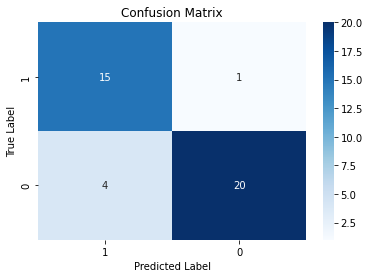

In [39]:
# plot confusion matrix
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC Score: 0.89


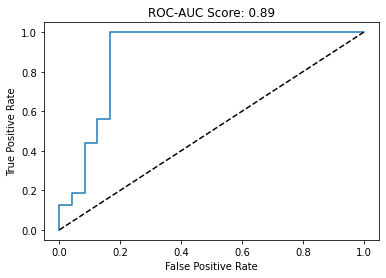

In [40]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc:.2f}')
plt.show()

## 2.2 Unsupervised learning - K-means Clustering

### 2.2.1 Data preparation

In [41]:
# Use Age and SpendingScore only
X_UL = db[['Age','SpendingScore']]

# Apply normalization
X_UL_scale = minmax_scale(X_UL)

Text(0, 0.5, 'SpendingScore')

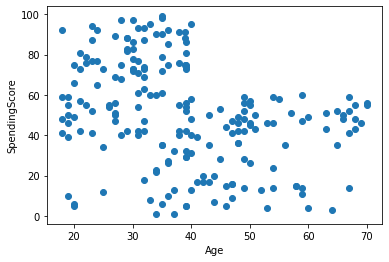

In [42]:
# Explore scatter plot
plt.scatter(db['Age'],db['SpendingScore'])
plt.xlabel('Age')
plt.ylabel('SpendingScore')

### 2.2.2 Learning

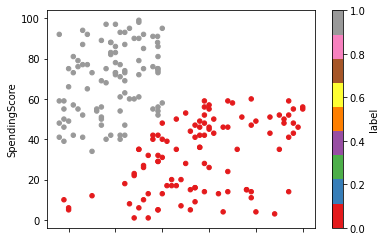

In [53]:
# Due to binary classification, use 2 clsuters
kmeans = KMeans(n_clusters=2, n_init=10)

# Fit the input data
kmeans.fit_predict(X_UL_scale)

# Visualise the clusters
labels = pd.DataFrame(kmeans.labels_)
db_UL1 = pd.concat([db, labels], axis=1)
db_UL1 = db_UL1.rename(columns={0:'label'})
db_UL1.plot.scatter(x='Age', y='SpendingScore', c='label', colormap='Set1')
plt.show()

In [54]:
db_UL1

,Gender,Age,AnnualIncome,SpendingScore,Buy,label
0,1,19.000000,15.000000,39,0,1
1,1,39.086022,15.000000,81,1,1
2,0,20.000000,16.000000,6,0,0
3,0,23.000000,16.000000,77,0,1
4,1,31.000000,17.000000,40,1,1
...,...,...,...,...,...,...
195,0,35.000000,120.000000,79,1,1
196,0,45.000000,126.000000,28,0,0
197,1,39.086022,126.000000,74,1,1
198,0,32.000000,137.000000,18,0,0


### 2.2.3 Evaluation

In [55]:
# Evaluation metrics
UL_accuracy = accuracy_score(db_UL1['Buy'], db_UL1['label'])
UL_precision = precision_score(db_UL1['Buy'], db_UL1['label'])
UL_recall = recall_score(db_UL1['Buy'], db_UL1['label'])
UL_f1 = f1_score(db_UL1['Buy'], db_UL1['label'])
print(f"Accuracy: {UL_accuracy:.2f}")
print(f"Precision: {UL_precision:.2f}")
print(f"Recall: {UL_recall:.2f}")
print(f"F1: {UL_f1:.2f}")

Accuracy: 0.69
Precision: 0.58
Recall: 0.72
F1: 0.64


Text(0.5, 1.0, 'Confusion Matrix')

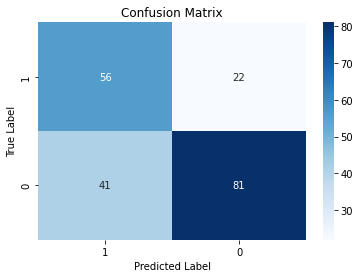

In [56]:
# plot confusion matrix
labels = [1, 0]
cm = confusion_matrix(db_UL1['Buy'], db_UL1['label'], labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC Score: 0.69


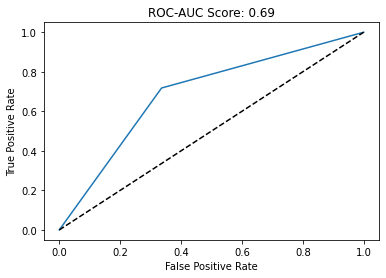

In [57]:
# ROC-AUC Score
roc_auc_UL = roc_auc_score(db_UL1['Buy'], db_UL1['label'])
print(f'ROC-AUC Score: {roc_auc_UL:.2f}')

fpr, tpr, _ = roc_curve(db_UL1['Buy'], db_UL1['label'])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc_UL:.2f}')
plt.show()

### 2.2.4 Optimisation of Algorithms

In [58]:
# Set parameter grid
params = {'init': ['k-means++', 'random'],
        'n_init':[3, 10, 100],
        'max_iter':[3, 10, 100],
        'algorithm':['lloyd', 'elkan']}

# Apply GridSearchCV
kmc = KMeans(random_state = 0)
grid_cv = GridSearchCV(kmc, param_grid = params, n_jobs = -1)
grid_cv.fit(X_UL_scale, db['Buy'])

print('Optimised hyper params: ', grid_cv.best_params_)
print(f'Best accuracy: {grid_cv.best_score_:.2f}')

Optimised hyper params:  {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 10, 'n_init': 3}
Best accuracy: -0.82


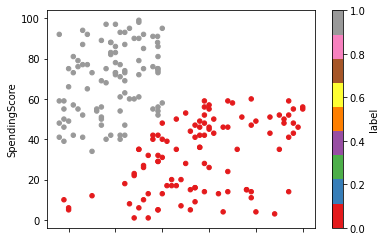

In [60]:
# Apply the best hyperparameters from above
kmeans2 = KMeans(n_clusters=2, algorithm='lloyd', init='random', max_iter=10, n_init=3)

# Fit the input data
kmeans2.fit_predict(X_UL_scale)

# Visualise the clusters
labels2 = pd.DataFrame(kmeans2.labels_)
db_UL2 = pd.concat([db, labels2], axis=1)
db_UL2 = db_UL2.rename(columns={0:'label'})
db_UL2.plot.scatter(x='Age', y='SpendingScore', c='label', colormap='Set1')
plt.show()

In [61]:
# Evaluation metrics
# The values are same with those before optimization

UL_accuracy2 = accuracy_score(db_UL2['Buy'], db_UL2['label'])
UL_precision2 = precision_score(db_UL2['Buy'], db_UL2['label'])
UL_recall2 = recall_score(db_UL2['Buy'], db_UL2['label'])
UL_f12 = f1_score(db_UL2['Buy'], db_UL2['label'])
print(f"Accuracy: {UL_accuracy2:.2f}")
print(f"Precision: {UL_precision2:.2f}")
print(f"Recall: {UL_recall2:.2f}")
print(f"F1: {UL_f12:.2f}")

Accuracy: 0.69
Precision: 0.58
Recall: 0.72
F1: 0.64


## 2.3 Semi-supervised learning - Label Propagation

### 2.3.1 Data preparation

In [62]:
rand= np.random.RandomState(0)

lp = LabelPropagation()

#Defining 70% of the samples to be unlabled
random_unlabeled_samples = rand.rand(len(y)) <= 0.7

#Seperating labeled and unlabled datasets
un_labeled = np.copy(y)
un_labeled[random_unlabeled_samples] = -1
un_labeled

array([-1,  1, -1, -1, -1, -1, -1,  0,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  0,  1,  1,  1, -1,  0, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        0, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1,  1,  0,  0, -1,  1,  0,  1, -1,  1, -1,
       -1, -1,  1,  0, -1, -1, -1, -1, -1,  0,  1,  0,  1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  0, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1])

### 2.3.2 Learning

In [66]:
#fit the model
lp.fit(X, un_labeled)

# Predict the Labels
pred_lb = lp.predict(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


### 2.3.3 Evaluation

Accuracy of Label Spreading:  100.00%
Accuracy: 0.72
Precision: 0.73
Recall: 0.46
F1: 0.57


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


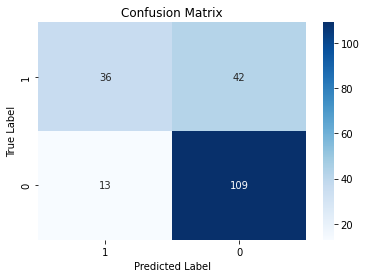

In [67]:
#Accuracy
print("Accuracy of Label Spreading: ",'{:.2%}'.format(lp.score(X,pred_lb)))
labels = [1, 0]
confusion_mat = confusion_matrix(y, pred_lb, labels=labels)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Evaluation metrics
lp_accuracy = accuracy_score(y, pred_lb)
lp_precision = precision_score(y, pred_lb)
lp_recall = recall_score(y, pred_lb)
lp_f1 = f1_score(y, pred_lb)
print(f"Accuracy: {lp_accuracy:.2f}")
print(f"Precision: {lp_precision:.2f}")
print(f"Recall: {lp_recall:.2f}")
print(f"F1: {lp_f1:.2f}")

ROC-AUC Score: 0.68


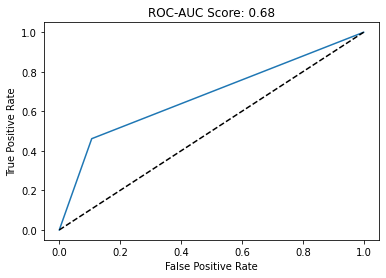

In [68]:
# ROC-AUC Score
roc_auc_SL = roc_auc_score(y, pred_lb)
print(f'ROC-AUC Score: {roc_auc_SL:.2f}')

fpr, tpr, _ = roc_curve(y, pred_lb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc_SL:.2f}')
plt.show()

### 2.3.4 Optimization of Algorithm

In [69]:
# Set parameter grid
params = {'kernel': ['knn'],
        'n_neighbors': np.linspace(10,100, num=10, dtype=int),
        'max_iter': np.linspace(5,10, num=5, dtype=int)}

# Apply GridSearchCV
lp = LabelPropagation(n_jobs = -1)
grid_cv = GridSearchCV(lp, param_grid = params, scoring='recall')
grid_cv.fit(X, y)

print('Optimised hyper params: ', grid_cv.best_params_)
print(f'Best accuracy: {grid_cv.best_score_:.2f}')

Optimised hyper params:  {'kernel': 'knn', 'max_iter': 5, 'n_neighbors': 20}
Best accuracy: 0.62


Accuracy of Label Spreading:  100.00%
Accuracy: 0.73
Precision: 0.64
Recall: 0.72
F1: 0.68


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:322: ConvergenceWarning: max_iter=5 was reached without convergence.
  warnings.warn(


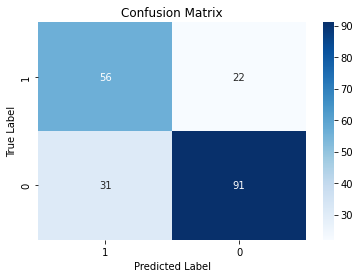

In [70]:
#fit the model
lp = LabelPropagation(kernel='knn', max_iter=5, n_neighbors=20)
lp.fit(X, un_labeled)

# Predict the Labels
pred_lb = lp.predict(X)

#Accuracy
print("Accuracy of Label Spreading: ",'{:.2%}'.format(lp.score(X,pred_lb)))
labels = [1, 0]
confusion_mat = confusion_matrix(y, pred_lb, labels=labels)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Evaluation metrics
ls_accuracy = accuracy_score(y, pred_lb)
ls_precision = precision_score(y, pred_lb)
ls_recall = recall_score(y, pred_lb)
ls_f1 = f1_score(y, pred_lb)
print(f"Accuracy: {ls_accuracy:.2f}")
print(f"Precision: {ls_precision:.2f}")
print(f"Recall: {ls_recall:.2f}")
print(f"F1: {ls_f1:.2f}")

ROC-AUC Score: 0.73


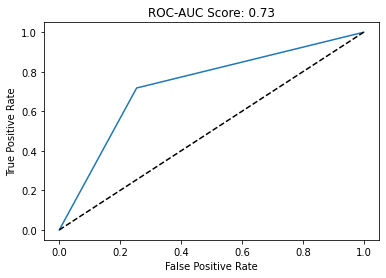

In [71]:
# ROC-AUC Score
roc_auc_SL = roc_auc_score(y, pred_lb)
print(f'ROC-AUC Score: {roc_auc_SL:.2f}')

fpr, tpr, _ = roc_curve(y, pred_lb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Score: {roc_auc_SL:.2f}')
plt.show()

# 3. Final Evaluation

In [72]:
final = pd.DataFrame({'Supervised - Random Forest': [0.88, 0.79, 0.94, 0.86, 0.89],
                      'Unsupervised - K-means Clustering':[0.69, 0.58, 0.72, 0.64, 0.69],
                      'Semi-supervised - Label Propagation': [0.73, 0.64, 0.72, 0.68, 0.73]},
                     index = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC'])
final

,Supervised - Random Forest,Unsupervised - K-means Clustering,Semi-supervised - Label Propagation
Accuracy,0.88,0.69,0.73
Precision,0.79,0.58,0.64
Recall,0.94,0.72,0.72
F1,0.86,0.64,0.68
ROC-AUC,0.89,0.69,0.73


<AxesSubplot: >

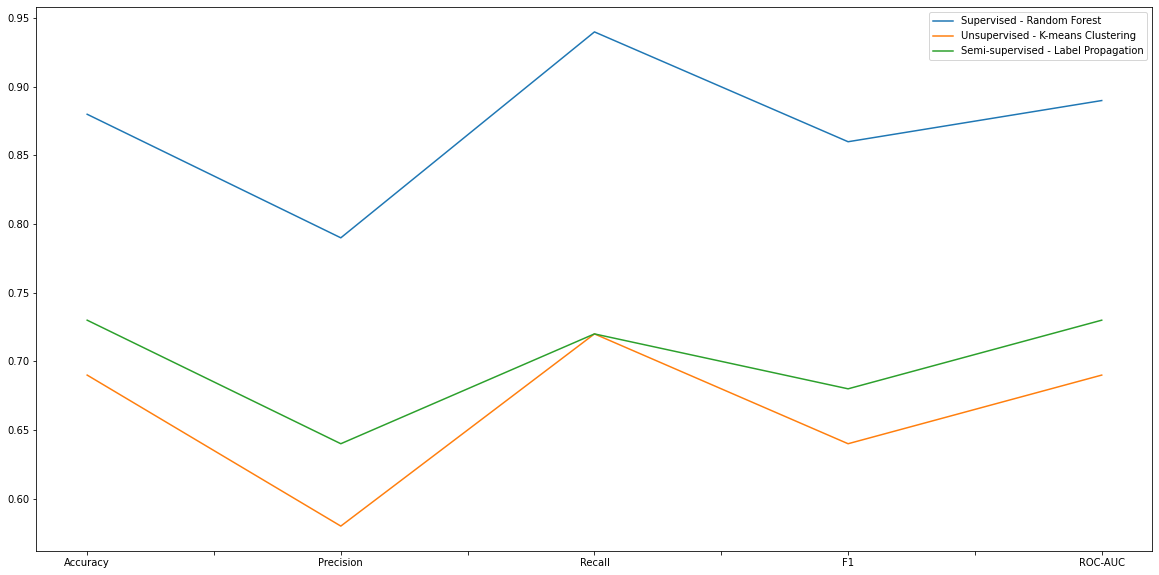

In [73]:
final.plot(figsize=(20,10))